In [2]:
########
#pipe grep command of move sequence into another grep command to get 1-0 to tabulate total wins, ties and losses
#these will need to be incremented in same way as counts

import networkx as nx
import matplotlib as plt
import numpy as np
import re
import chess
import chess.pgn
import chess.engine
import subprocess
import time
import timeit
import pickle
import stockfish
engine = chess.engine.SimpleEngine.popen_uci("./stockfish-10-64")

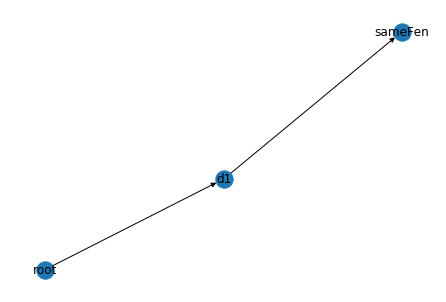

In [64]:
#make new graph
testSting = 'TEST'
count = 10
g = nx.DiGraph()
g.add_node('root')
g.add_node('d1',score = 100, movelist = {testSting:count})
g.add_node('sameFen',score = 100, movelist = {testSting:count})
g.add_edge('root','d1')
g.add_edge('d1','sameFen')
g.nodes['sameFen']
nx.draw(g, with_labels = True)

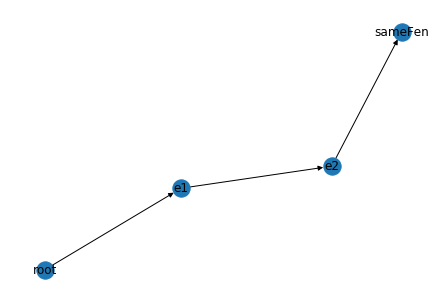

In [65]:
testSting = 'TEST2'
count = 20
h = nx.DiGraph()
h.add_node('root')
h.add_node('e1',score = 100, movelist = {testSting:count})
h.add_node('e2',score = 100, movelist = {"TEST3":15})
h.add_node('sameFen',score = 100, movelist = {testSting:count})
h.add_edge('root','e1')
h.add_edge('e1','e2')
h.add_edge('e2','sameFen')
nx.draw(h, with_labels = True)

root
d1
sameFen


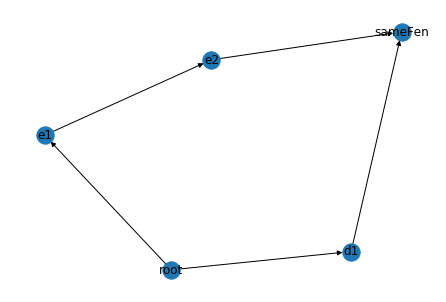

In [72]:
f = nx.compose(g,h)
for gnode in g:
    print(gnode)
    if(gnode == 'root'):
        pass
    elif gnode in h:
        if nx.get_node_attributes(g, 'movelist')[gnode].items() == nx.get_node_attributes(h, 'movelist')[gnode].items():
            pass
        else:
            #add the movelist, sum the count, sum win/loss/tie
            nx.get_node_attributes(f, 'movelist')[gnode] = nx.get_node_attributes(h, 'movelist')[gnode].update(nx.get_node_attributes(g, 'movelist')[gnode])

nx.draw(f, with_labels = True)

In [73]:
f.nodes['sameFen']

{'score': 100, 'movelist': {'TEST2': 20, 'TEST': 10}}

In [19]:
nx.get_node_attributes(h, 'movelist')['sameFen'] = nx.get_node_attributes(h, 'movelist')['sameFen'].update({'GTest':1000})
h.nodes['sameFen']

{'score': 100, 'movelist': {'TEST2': 20, 'GTest': 1000}}

In [43]:
d1 = {'gfg' : 1, 'is' : 2, 'best' : 3, 'for' : 4, 'CS' : 5} 
d2 = {'gfg' : 1, 'is' : 2, 'best' : 3} 
d1.items() == d2.items()

False